In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sb
%matplotlib inline


In [2]:
data = pd.read_csv("C:/Users/Abhishek Benjamin/Desktop/Download -2/Statistics/Data Set/diabetes.csv")


In [3]:
df = data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.corr().head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068


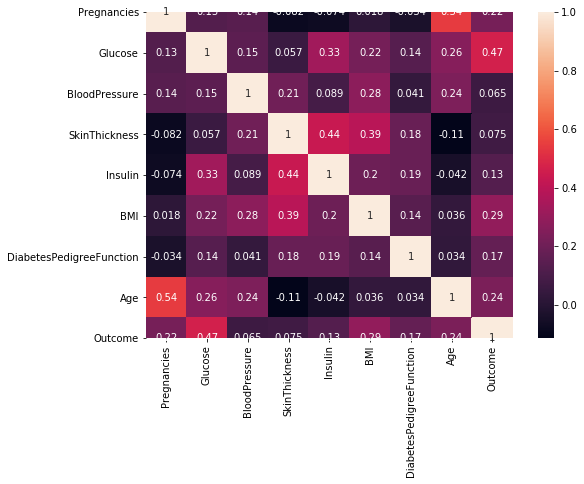

In [5]:
plt.figure(figsize=(9,6))
sb.heatmap(df.corr(), annot= True, vmax=1, square=True)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Bivariate Analysis of Independant Variables

- For Pattern Recognition


Text(0, 0.5, 'Body Mass Index')

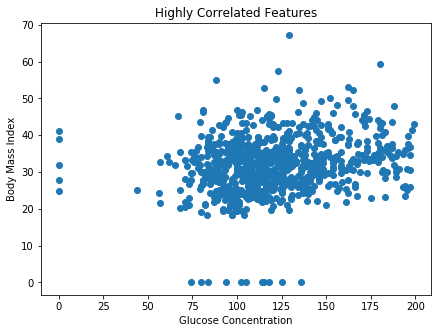

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(df.iloc[:,1],df.iloc[:,5])

plt.title('Highly Correlated Features')
plt.xlabel('Glucose Concentration')
plt.ylabel('Body Mass Index')

## Replacing the Zeros with Null values

In [8]:
df['Glucose'] = df['Glucose'].replace(0,np.NaN)
df['BMI'] = df['BMI'].replace(0,np.NaN)

df.dropna(inplace=True)

In [9]:
df[['Glucose']].describe()

,Glucose
count,752.000000
mean,121.941489
std,30.601198
min,44.000000
25%,99.750000
50%,117.000000
75%,141.000000
max,199.000000


Text(0, 0.5, 'Body Mass Index')

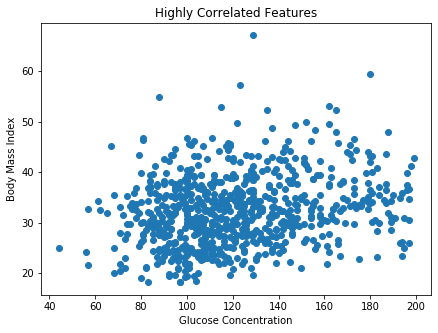

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(df.iloc[:,1],df.iloc[:,5])

plt.title('Highly Correlated Features')
plt.xlabel('Glucose Concentration')
plt.ylabel('Body Mass Index')

# Bifurcation into X & Y

In [11]:
X = data[['Glucose','BMI','Pregnancies','BloodPressure','SkinThickness','Insulin',
          'DiabetesPedigreeFunction','Age']].values

Y = data[['Outcome']].values

# Standardization of X

- It is done to turn Mean (Mu) into 0 & Standard Deviation (Sigma) into 1
- Remember the concept of Gaussian Distribution or Std. Normal Distribution using Z-sore

In [12]:
sc = StandardScaler()

X = sc.fit_transform(X)

In [13]:
mean = np.mean(X)
# print('Mean :' (mean[0],mean[1]))


std = np.std(X)
print('Standard deviation:', std)

Standard deviation: 1.0


# Train - Test Split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Logistic Regression Model

In [15]:
logreg = LogisticRegression()

# Fitting the model with data

logreg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Predictions

In [16]:
y_pred = logreg.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

# Performance & Accuracy

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print('Accuracy Score is :', accuracy_score(y_test,y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy Score is : 82.46753246753246
Precision: 76.31578947368422
Recall: 61.702127659574465


In [19]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[98,  9],
       [18, 29]], dtype=int64)

# Area Under Curve (AuC)

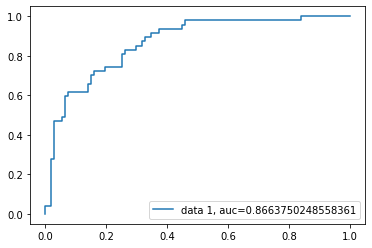

In [20]:
y_pred_proba = logreg.predict_proba(x_test)[:,1]

fpr, tpr,_ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.show()